<a href="https://colab.research.google.com/github/bellaabdelouahab/Colab-Notebooks/blob/main/TrafficSignsRecognation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle
!pip install --upgrade --force-reinstall --no-deps kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json
!kaggle competitions -h
!kaggle competitions download -c DATASET
from IPython.display import clear_output
clear_output(wait=True)
print("All Good")

All Good


In [2]:
!kaggle datasets download -d valentynsichkar/traffic-signs-preprocessed
from IPython.display import clear_output
clear_output(wait=True)
print("DataSet Downloaded Seccessfully")

DataSet Downloaded Seccessfully


In [5]:
!mkdir trafficSigns
!unzip traffic-signs-preprocessed.zip -d trafficSigns
clear_output(wait=True)
print("file unziped seccessfully")

file unziped seccessfully


In [6]:
import pandas as pd
Data = pd.read_pickle("/content/trafficSigns/data8.pickle")

In [7]:
len(Data)

7

In [8]:
Data.keys()

dict_keys(['y_validation', 'x_train', 'y_train', 'x_validation', 'labels', 'x_test', 'y_test'])

In [36]:
X_train = Data["x_train"]
Y_train = Data["y_train"]
X_test = Data["x_test"]
Y_test = Data["y_test"]
X_validation = Data["x_validation"]
Y_validation = Data["y_validation"]
labels = Data["labels"]

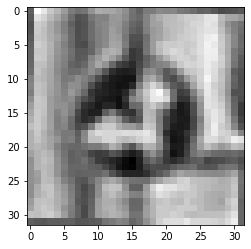

In [10]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0].reshape(32,32), cmap='gray')
plt.show()
# Data["x_train"][0].shape

In [11]:
X_train.shape

(86989, 1, 32, 32)

In [38]:
X_train = X_train.swapaxes(1,2)
X_train = X_train.swapaxes(2,3)

X_test = X_test.swapaxes(1,2)
X_test = X_test.swapaxes(2,3)

X_validation = X_validation.swapaxes(1,2)
X_validation = X_validation.swapaxes(2,3)

X_train.shape

(86989, 32, 32, 1)

In [13]:
len(labels)

43

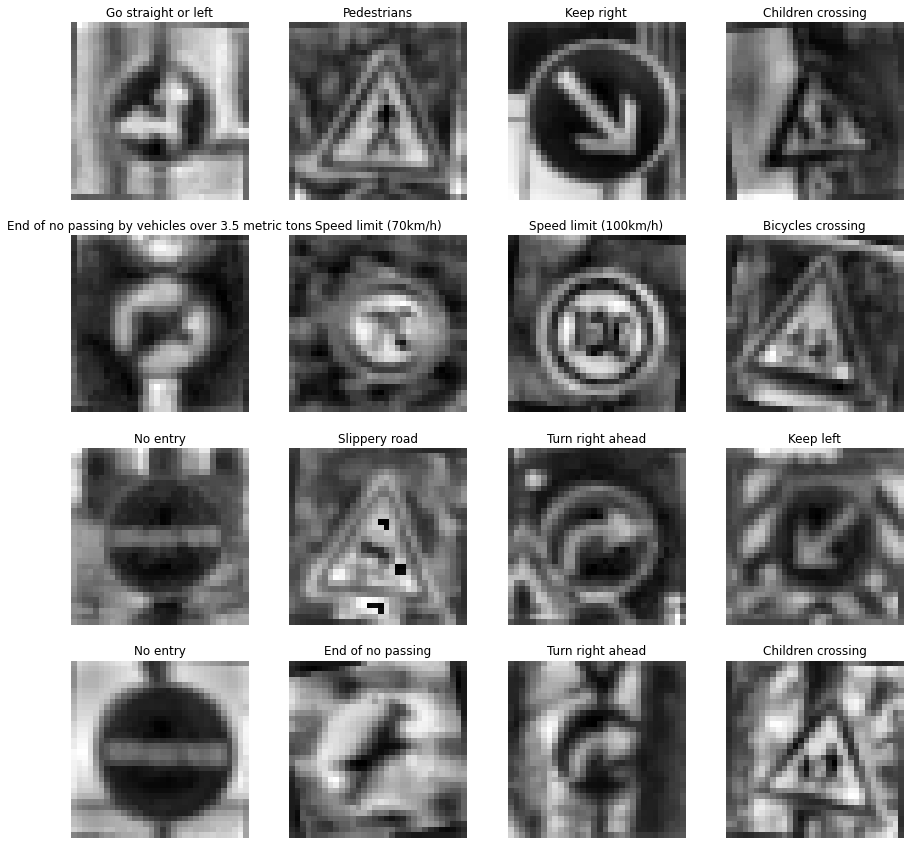

In [14]:
plt.figure(figsize=(15,15)) 

for i in range(16):
    plt.subplot(4,4,i+1)  
    plt.title(labels[Y_train[i]]) 
    plt.imshow(X_train[i].reshape(32,32), cmap = "gray")
    plt.axis("off")

plt.show()

In [30]:
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_train,43)
Y_test = to_categorical(Y_test,43)
# Y_test = to_categorical(Y_test,43)

In [15]:
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D
from keras import Sequential

In [16]:
from numpy import matrix
Model = Sequential(
    [
     Conv2D(32,kernel_size =3 , input_shape=(32,32,1),activation= "relu"),
     MaxPool2D(3,3),
     Conv2D(64,kernel_size =3 ,activation= "relu"),
     Flatten(),
     Dense(43,activation="softmax")
    ]
)

In [22]:
Model.compile(
    optimizer = 'sgd',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [23]:
Model.fit(X_train , Y_train , epochs=10)

Epoch 1/10
2719/2719 [==============================] - 78s 29ms/step - loss: 1.0490 - accuracy: 0.7532
Epoch 2/10
2719/2719 [==============================] - 70s 26ms/step - loss: 0.1860 - accuracy: 0.9609
Epoch 3/10
2719/2719 [==============================] - 68s 25ms/step - loss: 0.0991 - accuracy: 0.9791
Epoch 4/10
2719/2719 [==============================] - 69s 25ms/step - loss: 0.0639 - accuracy: 0.9871
Epoch 5/10
2719/2719 [==============================] - 71s 26ms/step - loss: 0.0460 - accuracy: 0.9905
Epoch 6/10
2719/2719 [==============================] - 79s 29ms/step - loss: 0.0337 - accuracy: 0.9935
Epoch 7/10
2719/2719 [==============================] - 69s 26ms/step - loss: 0.0258 - accuracy: 0.9950
Epoch 8/10
2719/2719 [==============================] - 71s 26ms/step - loss: 0.0203 - accuracy: 0.9962
Epoch 9/10
2719/2719 [==============================] - 74s 27ms/step - loss: 0.0163 - accuracy: 0.9974
Epoch 10/10
2719/2719 [==============================] - 67s 25m

In [31]:
Model.evaluate(X_test,Y_test)

395/395 [==============================] - 4s 9ms/step - loss: 0.3985 - accuracy: 0.9174


[0.39851564168930054, 0.9174188375473022]

Go straight or left


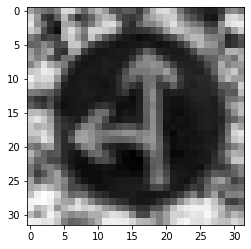

In [41]:
predict = Model.predict(X_validation)

import numpy as np

pred = labels[np.argmax(predict[1])]

print(pred)

plt.imshow(X_validation[1].reshape(32,32), cmap='gray')
plt.show()